In [16]:
import sys
sys.path.append("/data1/andrew/meng/mixehr/meng/VAE-EHR/src")
import pandas as pd

import torch
from torch import nn, optim

In [17]:
import vae

from vae import VAE, VAETrainer
from icd_analysis_helper import ICDAnalysisHelper
from visualizer_helper import Visualizer

from config_reader import Config

In [18]:
###Load Configuration file
config = Config('./config.ini')
config.__dict__

{'patient_icd_path': '/data1/andrew/meng/mixehr/data/Mimic/andrew_outputs/PATIENT_ICD_BINARY.csv',
 'icd9codes_path': '/data1/andrew/meng/mixehr/data/Mimic/mimic-iii-clinical-database-1.4/D_ICD_DIAGNOSES.csv.gz',
 'experiment_name': '200113_patient_clusters_25_latent_dim',
 'encoder_dim': [(250, 500), (500, 250), (250, 100)],
 'latent_dim': 25,
 'decoder_dim': [],
 'use_relu': True}

In [19]:
###Load Data
patient_icd_df=pd.read_csv(config.patient_icd_path, sep=' ')
patient_icd_data = patient_icd_df.drop('SUBJECT_ID', axis=1)
data = torch.tensor(patient_icd_data.values).float()
print(data.shape)

icd9codes = pd.read_csv(config.icd9codes_path)
icd_analyzer = ICDAnalysisHelper(icd9codes_df = icd9codes, patient_icd_df = patient_icd_df)
#icd_analyzer.lookup_icds(icd9codes, ["4019", "41401"])

visualizer = Visualizer()

torch.Size([46520, 6984])


In [20]:
###Load Model
print("Feature_dim: {}".format(data.shape[1]))
model = VAE(
    feature_dim = data.shape[1], 
    encoder_dim = config.encoder_dim,
    latent_dim = config.latent_dim,
    decoder_dim = config.decoder_dim,
    use_relu= config.use_relu
)

optimizer = optim.Adam(model.parameters(), lr=0.001)
print(type(optimizer))

Feature_dim: 6984
<class 'torch.optim.adam.Adam'>


In [21]:
###Load Trainer
experiment_name=config.experiment_name
trainer = VAETrainer(
    model=model, 
    optimizer=optimizer,
    experiment_name=experiment_name
)

In [12]:
###Train Model
trainer.train(
    data=data, 
    epochs=40,
    batch_size=40,
    save_model_interval=5,
    clip_gradients=False
)

  1%|          | 13/1163 [00:00<00:09, 125.42it/s]

====> Epoch: 1 Average loss: 7216571598.4302


  1%|          | 12/1163 [00:00<00:09, 117.55it/s]

====> Epoch: 2 Average loss: 3685.4776


  1%|          | 14/1163 [00:00<00:08, 133.90it/s]

====> Epoch: 3 Average loss: 3069.4025


  1%|          | 14/1163 [00:00<00:08, 136.34it/s]

====> Epoch: 4 Average loss: 2777.4912


  1%|          | 13/1163 [00:00<00:08, 129.06it/s]

====> Epoch: 5 Average loss: 2592.2190


  1%|▏         | 15/1163 [00:00<00:07, 149.93it/s]

====> Epoch: 6 Average loss: 2461.5009


  1%|          | 14/1163 [00:00<00:08, 132.50it/s]

====> Epoch: 7 Average loss: 2356.0545


  1%|          | 10/1163 [00:00<00:12, 94.25it/s]

====> Epoch: 8 Average loss: 2270.4519


  1%|▏         | 16/1163 [00:00<00:07, 153.91it/s]

====> Epoch: 9 Average loss: 2200.6717


  1%|▏         | 15/1163 [00:00<00:08, 142.70it/s]

====> Epoch: 10 Average loss: 2143.1413


  1%|▏         | 17/1163 [00:00<00:07, 161.47it/s]

====> Epoch: 11 Average loss: 2092.5066


  1%|          | 14/1163 [00:00<00:08, 138.79it/s]

====> Epoch: 12 Average loss: 2051.1837


  1%|▏         | 16/1163 [00:00<00:07, 151.93it/s]

====> Epoch: 13 Average loss: 2016.5420


  1%|          | 12/1163 [00:00<00:09, 118.98it/s]

====> Epoch: 14 Average loss: 1986.5587


  1%|          | 12/1163 [00:00<00:10, 113.38it/s]

====> Epoch: 15 Average loss: 1960.3699


  1%|          | 11/1163 [00:00<00:11, 102.70it/s]

====> Epoch: 16 Average loss: 1937.6444


  2%|▏         | 18/1163 [00:00<00:06, 174.05it/s]

====> Epoch: 17 Average loss: 1918.7929


  2%|▏         | 18/1163 [00:00<00:06, 172.13it/s]

====> Epoch: 18 Average loss: 1898.5169


  1%|▏         | 17/1163 [00:00<00:06, 166.86it/s]

====> Epoch: 19 Average loss: 1885.1294


  1%|▏         | 16/1163 [00:00<00:07, 151.28it/s]

====> Epoch: 20 Average loss: 1866.9519


  1%|          | 10/1163 [00:00<00:11, 99.66it/s]

====> Epoch: 21 Average loss: 1851.6960


  2%|▏         | 18/1163 [00:00<00:06, 174.95it/s]

====> Epoch: 22 Average loss: 1839.4113


  1%|▏         | 16/1163 [00:00<00:07, 152.70it/s]

====> Epoch: 23 Average loss: 1827.3747


  2%|▏         | 18/1163 [00:00<00:06, 173.70it/s]

====> Epoch: 24 Average loss: 1817.9427


  1%|▏         | 17/1163 [00:00<00:06, 166.29it/s]

====> Epoch: 25 Average loss: 1805.7377


  1%|▏         | 17/1163 [00:00<00:06, 166.98it/s]

====> Epoch: 26 Average loss: 1797.1286


  1%|▏         | 16/1163 [00:00<00:07, 156.91it/s]

====> Epoch: 27 Average loss: 1788.0964


  1%|          | 14/1163 [00:00<00:08, 135.89it/s]

====> Epoch: 28 Average loss: 1779.1135


  1%|          | 14/1163 [00:00<00:08, 132.04it/s]

====> Epoch: 29 Average loss: 1771.9636


  2%|▏         | 18/1163 [00:00<00:06, 170.48it/s]

====> Epoch: 30 Average loss: 1761.2074


  1%|          | 13/1163 [00:00<00:09, 121.40it/s]

====> Epoch: 31 Average loss: 1753.3717


  1%|▏         | 15/1163 [00:00<00:07, 144.11it/s]

====> Epoch: 32 Average loss: 1744.6236


  1%|          | 12/1163 [00:00<00:09, 115.61it/s]

====> Epoch: 33 Average loss: 1734.7040


  1%|          | 12/1163 [00:00<00:09, 116.05it/s]

====> Epoch: 34 Average loss: 1725.4491


  1%|▏         | 15/1163 [00:00<00:07, 147.66it/s]

====> Epoch: 35 Average loss: 1713.7500


  1%|          | 14/1163 [00:00<00:08, 139.59it/s]

====> Epoch: 36 Average loss: 1701.4274


  1%|          | 14/1163 [00:00<00:08, 132.30it/s]

====> Epoch: 37 Average loss: 1693.8591


  1%|          | 13/1163 [00:00<00:09, 122.04it/s]

====> Epoch: 38 Average loss: 1676.5116


  1%|          | 12/1163 [00:00<00:10, 112.30it/s]

====> Epoch: 39 Average loss: 1663.2664


100%|██████████| 1163/1163 [00:08<00:00, 133.50it/s]

====> Epoch: 40 Average loss: 1647.1031


In [22]:
###Load pre-trained model
epoch = 40
model.load_state_dict(torch.load("./VAE_exp_{}_epoch_{}.pkl".format(experiment_name, epoch)))
trainer.model = model

In [23]:
###Encode data
latent, means, var = trainer.encode_data(data)

In [24]:
###Get UMAP representations
X_umap = visualizer.umap_embedding(latent.cpu().detach().numpy())
X_umap_means = visualizer.umap_embedding(means.cpu().detach().numpy())
X_umap_vars = visualizer.umap_embedding(var.cpu().detach().numpy())

/data1/andrew/meng/mixehr/meng/VAE-EHR/src/visualizer_helper.py:18: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  return UMAP(n_components=n_components).fit_transform(X)
/data1/andrew/meng/mixehr/meng/VAE-EHR/src/visualizer_helper.py:18: UserWarning: Parameter should_downcast is deprecated, use convert_dtype in fit, fit_transform and transform  methods instead. 
  return UMAP(n_components=n_components).fit_transform(X)


Occurences of heart before filter: 97
After: 77
Occurences of atrial before filter: 4
After: 4
Occurences of coronary before filter: 21
After: 18
Occurences of hypertension before filter: 61
After: 27
Occurences of vascular before filter: 116
After: 85
Total Relevant ICDs: 211
Patients with disease(s): 29510


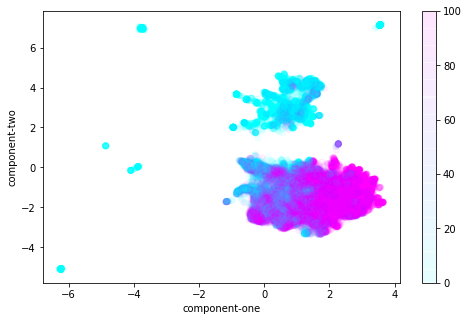

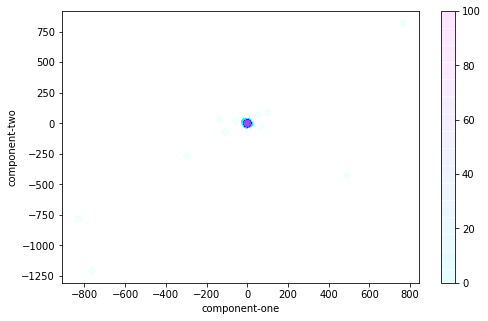

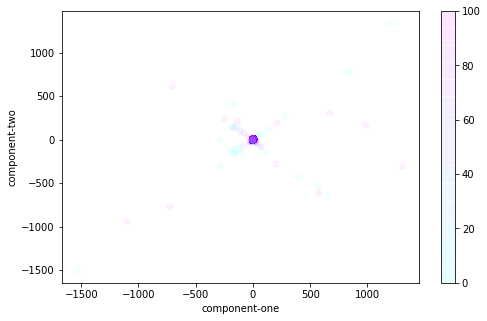

In [25]:
###Plot UMAP representations
heart_keywords = ['heart', 'atrial', 'coronary', 'hypertension', 'vascular']
heart_patient_idxs = icd_analyzer.get_patients_idxs_with_disease_keywords(substrings=heart_keywords, case_sensitive=False)
heart_colors = np.array([0 for i in range(X_umap.shape[0])])
heart_colors[heart_patient_idxs] = 100

visualizer.plot2d(
    X=X_umap, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap"), 
    colors=heart_colors,
)
visualizer.plot2d(
    X=X_umap_means, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_means"), 
    colors=heart_colors,
)
visualizer.plot2d(
    X=X_umap_vars, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_vars"), 
    colors=heart_colors,
)

Occurences of congenital before filter: 167
After: 86
Occurences of infant before filter: 38
After: 21
Occurences of newborn before filter: 117
After: 77
Occurences of neonatal before filter: 21
After: 18
Occurences of born before filter: 195
After: 94
Occurences of birth before filter: 173
After: 39
Total Relevant ICDs: 335
Patients with disease(s): 8665


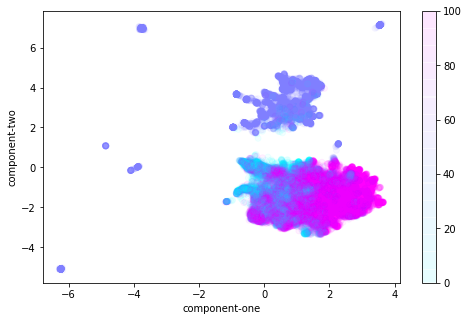

In [26]:
###Additional Visualizations
baby_keywords = ['congenital', 'infant', 'newborn', 'neonatal', 'born', 'birth']
baby_patient_idxs = icd_analyzer.get_patients_idxs_with_disease_keywords(substrings=baby_keywords, case_sensitive=False)

baby_heart_colors = np.array([0 for i in range(X_umap.shape[0])])
baby_heart_colors[heart_patient_idxs] = 100
baby_heart_colors[baby_patient_idxs] = 50

visualizer.plot2d(X_umap, "Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_baby_heart_umap"), colors=baby_heart_colors)

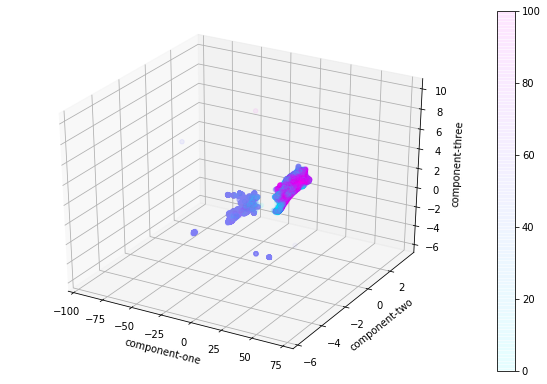

In [27]:
X_umap_3d = visualizer.umap_embedding(latent.cpu().detach().numpy(), n_components=3)

visualizer.plot3d(
    X=X_umap_3d, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_3D"), 
    colors=baby_heart_colors,
)